# Observations

In [1]:
# 1). Urban rides far excede suburban and rural rides
# 2). There are far more drivers in urban cities
# 3). The average fare is lower in urban cities with the highest fares occuring in rural cities even though there are fewer number of rides
# Note: I have not exploded the pie charts or made them 3D as David does like this :)

# Initialization

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("../The-Power-of-Plots/data/city_data.csv")
ride_data_to_load = pd.read_csv("../The-Power-of-Plots/data/ride_data.csv")

# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview
combined_data_df = pd.merge(city_data_to_load, ride_data_to_load, how = "outer", on="city")
combined_data_df.head()
combined_data_df = combined_data_df.rename(columns={"city":"City" , "driver_count":"Driver Count" , "type":"Type" , "date":"Date" , "fare":"Fare" , "ride_id":"Ride ID"})
combined_data_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

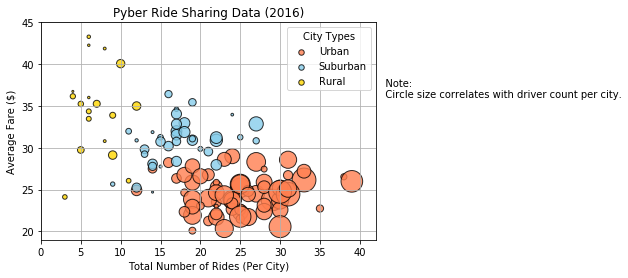

In [3]:
# Obtain the x and y coordinates for each of the three city types 
df1 = pd.DataFrame(combined_data_df)
typegroupcombined_data_df1 = df1.groupby(["Type" , "City"])
fares = typegroupcombined_data_df1["Fare"].mean()
rides = typegroupcombined_data_df1["Ride ID"].count()
drivers = typegroupcombined_data_df1["Driver Count"].sum()

plot = pd.DataFrame(columns=['Fares', 'Rides' , 'Drivers'])
plot['Fares'] = fares
plot['Rides'] = rides
plot['Drivers'] = drivers

Urban = plot.filter(like='Urban', axis=0)
ufares = Urban["Fares"]
urides = Urban["Rides"]
udrivers = Urban["Drivers"]

Suburban = plot.filter(like='Suburban', axis=0)
sfares = Suburban["Fares"]
srides = Suburban["Rides"]
sdrivers = Suburban["Drivers"]

Rural = plot.filter(like='Rural', axis=0)
rfares = Rural["Fares"]
rrides = Rural["Rides"]
rdrivers = Rural["Drivers"]


# Build the scatter plots for each city types
plt.scatter(urides, ufares, marker="o", alpha=0.8, s=Urban["Drivers"]*.25, edgecolors="black", label='Urban', color='coral')
plt.scatter(srides, sfares, marker="o", alpha=0.8, s=Suburban["Drivers"]*.3, edgecolors="black", label='Suburban', color='skyblue')
plt.scatter(rrides, rfares, marker="o", alpha=0.8, s=Rural["Drivers"], edgecolors="black", label='Rural', color='gold')

# Incorporate the other graph properties
x_limit = 42
y_limt = 45
plt.ylim(19, y_limt)
plt.xlim(0, x_limit)

plt.grid()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
chart_title = ('Pyber Ride Sharing Data (2016)')
plt.title(chart_title)

# Create a legend
lgnd = plt.legend(title="City Types", fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate('   Note:\n   Circle size correlates with driver count per city.', xy=(42, 36))

# Save Figure
plt.savefig('../The-Power-of-Plots/BubblePlotofRideSharingData.png', bbox_inches='tight')
plt.show()
plt.close()

## Total Fares by City Type

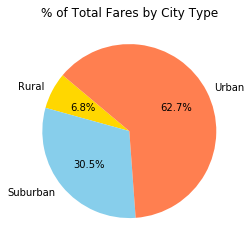

In [4]:
# Calculate Type Percents
df4 = pd.DataFrame(combined_data_df)
typegroupcombined_data_df4 = df4.groupby(["Type"])
total_fares = combined_data_df["Ride ID"].count()
fares = typegroupcombined_data_df4["Fare"].sum()
totes_fares = fares / total_fares
type_title = ('% of Total Fares by City Type')

# Build Pie Chart - Did not explode as David does like this :)
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue" , "coral"]
plt.pie(totes_fares, labels=labels, autopct="%1.1f%%" , colors=colors, shadow=False, startangle=140)
plt.title(type_title)

# Save Figure
plt.savefig('../The-Power-of-Plots/perc_Total_Fare.png')
plt.show()
plt.close()

## Total Rides by City Type

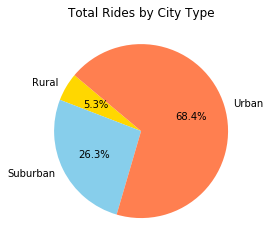

In [5]:
# Calculate Ride Percents
df3 = pd.DataFrame(combined_data_df)
typegroupcombined_data_df3 = df3.groupby(["Type"])
total_rides = combined_data_df["Ride ID"].count()
rides = typegroupcombined_data_df3["Ride ID"].count()
totes_rides= rides / total_rides
rides_title = ('Total Rides by City Type')

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue" , "coral"]
plt.pie(totes_rides, labels=labels, autopct="%1.1f%%" , colors=colors, shadow=False, startangle=140)
plt.title(rides_title)

# Save Figure
plt.savefig('../The-Power-of-Plots/Total_Rides_City.png')
plt.show()
plt.close()

## Total Drivers by City Type

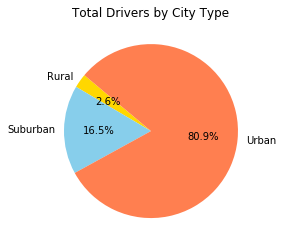

In [6]:
# Calculate Driver Percents
df5 = pd.DataFrame(city_data_to_load)
total_drivercount = df5["driver_count"].sum()
typegroupcombined_data_df5 = df5.groupby(["type"])
group_count = typegroupcombined_data_df5["driver_count"].sum()
totes_driver = group_count / total_drivercount
drivers_title = ('Total Drivers by City Type')

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue" , "coral"]
plt.pie(totes_driver, labels=labels, autopct="%1.1f%%" , colors=colors, shadow=False, startangle=140)
plt.title(drivers_title)

# Save Figure
plt.savefig('../The-Power-of-Plots/Total_Drivers_City.png')
plt.show()
plt.close()